In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [177]:
# Let's read the image
img = cv2.imread('C:/Users/user/anaconda3/book5.jpg')
# Convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) / 255
rows, cols = gray.shape

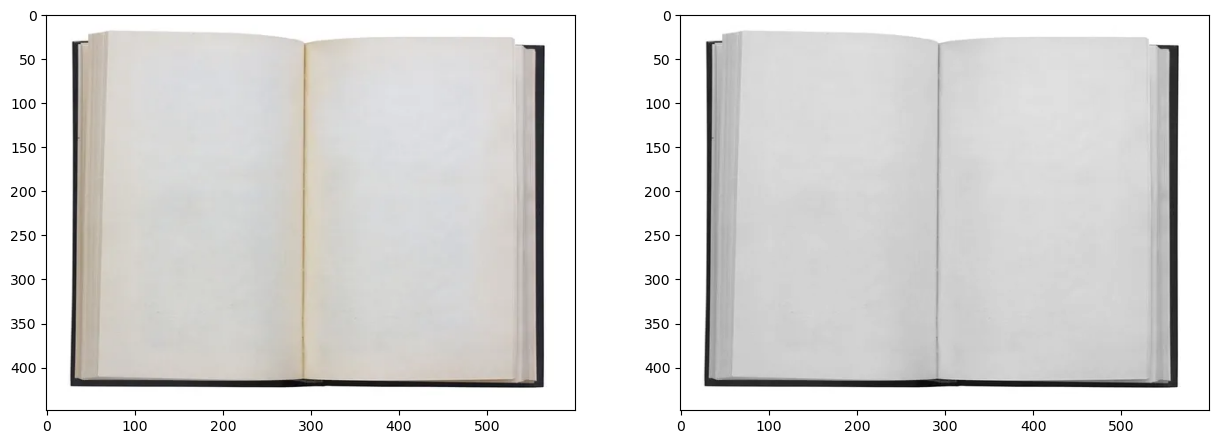

In [178]:
# Display the images (color and gray scale)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(gray, cmap='gray')
plt.show()

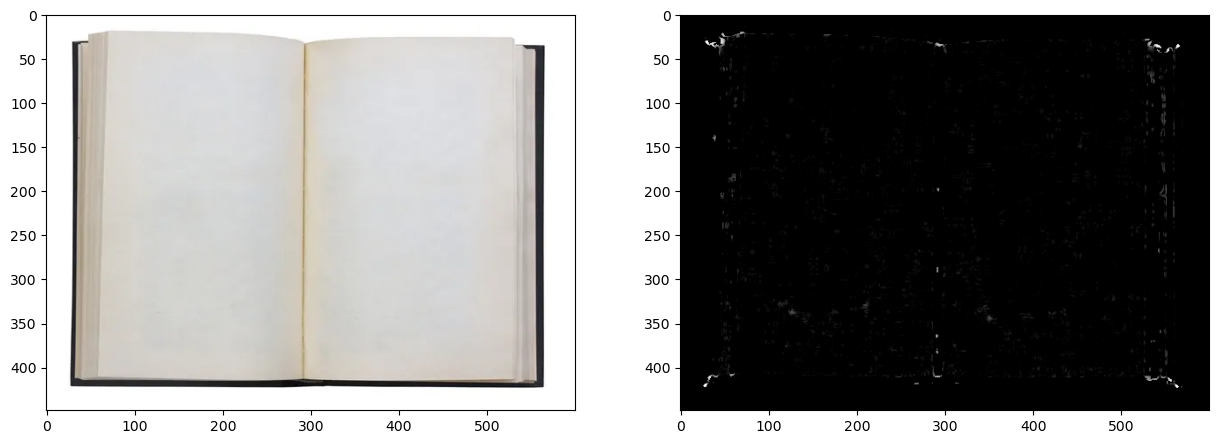

In [179]:
# Compute Harris corners
block_size = 3
ksize = 7  
k = 0.04
cornerness = cv2.cornerHarris(gray, block_size, ksize, k)

# Suppress negative values of cornerness
cornerness[cornerness < 0] = 0

# Logarithmic scale for better visualization
cornerness = np.log(cornerness + 1e-6)

# Display the image and the corresponding Harris corners (in log scale)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cornerness, cmap='gray')
plt.show()


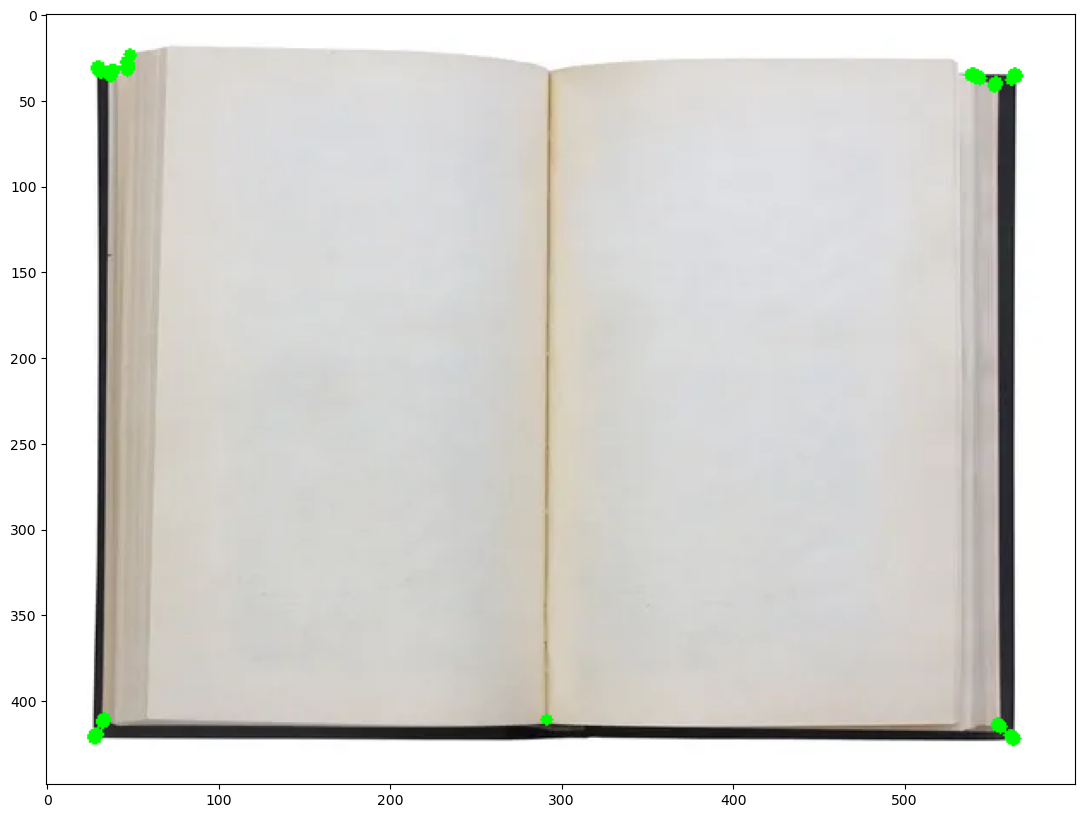

In [180]:
# Visualize all detected corners
detected_corners = img.copy()
threshold = 0.01 * cornerness.max()  
corners = np.where(cornerness > threshold)

for r, c in zip(*corners):
    detected_corners = cv2.circle(detected_corners, (c, r), 3, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(detected_corners, cv2.COLOR_BGR2RGB))
plt.show()


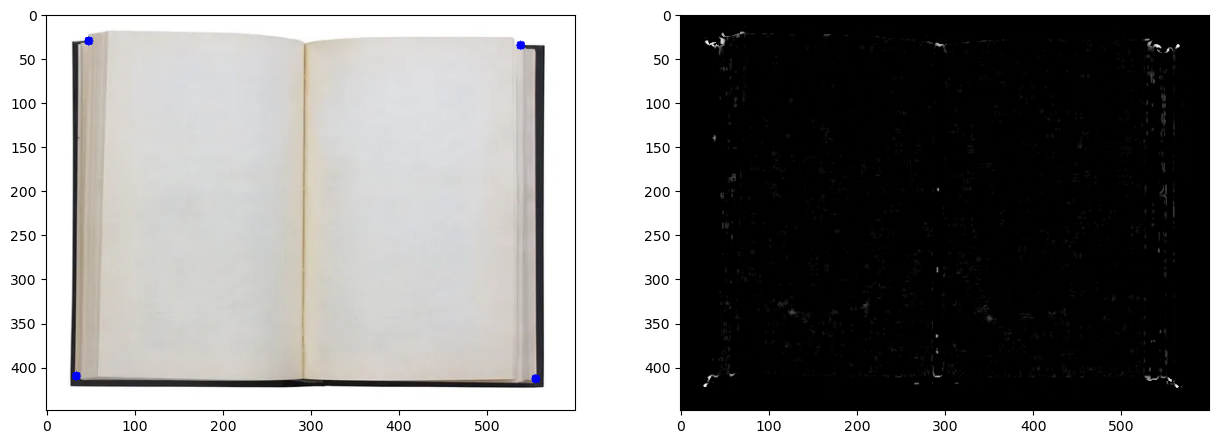

In [184]:
# Detection thresholds
th_top_left, th_top_right = -1e6, -1e6
th_bottom_left, th_bottom_right = -1e6, -1e6

# Corner coordinates
opt_top_left, opt_top_right = None, None
opt_bottom_left, opt_bottom_right = None, None

# Size of each quadrant (in pixels)
quad_size = 30

# Scan the Harris detection results
for r in range(quad_size, rows-quad_size):
    for c in range(quad_size, cols-quad_size):
        if cornerness[r, c] < threshold:
            continue
        
        # Extract block consisting of 4 quadrants
        block = 255 * gray[r-quad_size:r+quad_size+1, c-quad_size:c+quad_size+1]
        
        # Extract the four quadrants
        quad_top_left = block[0:quad_size, 0:quad_size]
        quad_top_right = block[0:quad_size, quad_size+1:]
        quad_bottom_left = block[quad_size+1:, 0:quad_size]
        quad_bottom_right = block[quad_size+1:, quad_size+1:]
        
        # Top-left corner
        descriptor = np.mean(quad_bottom_right) - (np.mean(quad_top_left) + np.mean(quad_top_right) + np.mean(quad_bottom_left))
        if descriptor > th_top_left:
            th_top_left = descriptor
            opt_top_left = (c, r)
        
        # Top-right corner
        descriptor = np.mean(quad_bottom_left) - (np.mean(quad_top_right) + np.mean(quad_top_left) + np.mean(quad_bottom_right))
        if descriptor > th_top_right:
            th_top_right = descriptor
            opt_top_right = (c, r)
        
        # Bottom-left corner
        descriptor = np.mean(quad_top_right) - (np.mean(quad_bottom_left) + np.mean(quad_top_left) + np.mean(quad_bottom_right))
        if descriptor > th_bottom_left:
            th_bottom_left = descriptor
            opt_bottom_left = (c, r)
        
        # Bottom-right corner
        descriptor = np.mean(quad_top_left) - (np.mean(quad_bottom_right) + np.mean(quad_top_right) + np.mean(quad_bottom_left))
        if descriptor > th_bottom_right:
            th_bottom_right = descriptor
            opt_bottom_right = (c, r)

# Draw circles at the detected corners
out = img.copy()
if opt_top_left:
    out = cv2.circle(out, opt_top_left, 5, (255, 0, 0), -1)
if opt_top_right:
    out = cv2.circle(out, opt_top_right, 5, (255, 0, 0), -1)
if opt_bottom_left:
    out = cv2.circle(out, opt_bottom_left, 5, (255, 0, 0), -1)
if opt_bottom_right:
    out = cv2.circle(out, opt_bottom_right, 5, (255, 0, 0), -1)

# Display the images (with the detected document corners)
plt.subplot(121), plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cornerness, cmap='gray')
plt.show()
